In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-01-26 20:07:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2022-01-26 20:07:59 (11.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



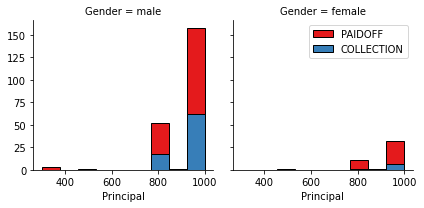

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

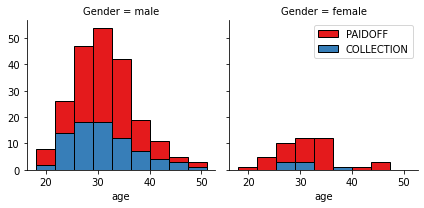

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


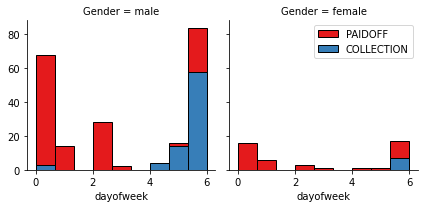

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Let's use the training set to build an accurate model. Then use the test set to report the accuracy of the model
We'll use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


First let's split our data set into train and test sets 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


Import needed libraries for KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

We can calculate the accuracy of KNN for different values of k.

In [22]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred_knn=knn_model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, pred_knn)

    
    std_acc[n-1]=np.std(pred_knn==y_test)/np.sqrt(pred_knn.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

Plot the model accuracy for a different number of neighbors.

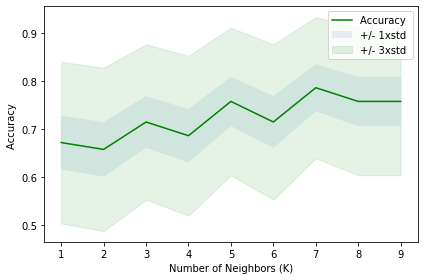

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


In [25]:
knn_model = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

# Decision Tree


Import needed libraries for Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [27]:
Ns = 10
mean_acc = np.zeros((Ns-1))
std_acc = np.zeros((Ns-1))
for n in range(1,Ns):
    
    #Create an instance of the DecisionTreeClassifier called tree_model and train the model
    tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    #Predict 
    predTree = tree_model.predict(X_test)
    #Evaluation
    mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)

    
    std_acc[n-1]=np.std(predTree==y_test)/np.sqrt(predTree.shape[0])

mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286])

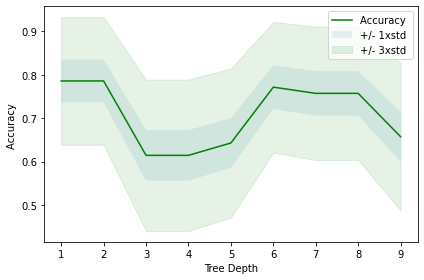

In [28]:
plt.plot(range(1,Ns),mean_acc,'g')
plt.fill_between(range(1,Ns),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ns),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Tree Depth')
plt.tight_layout()
plt.show()

Trees with best accuracy are depths 1, 2 and 6. Depth 1 and 2 seem oversiplified, so we will pick the best tree with depth 6

In [29]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train,y_train)
predTree = tree_model.predict(X_test)

In [30]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [31]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

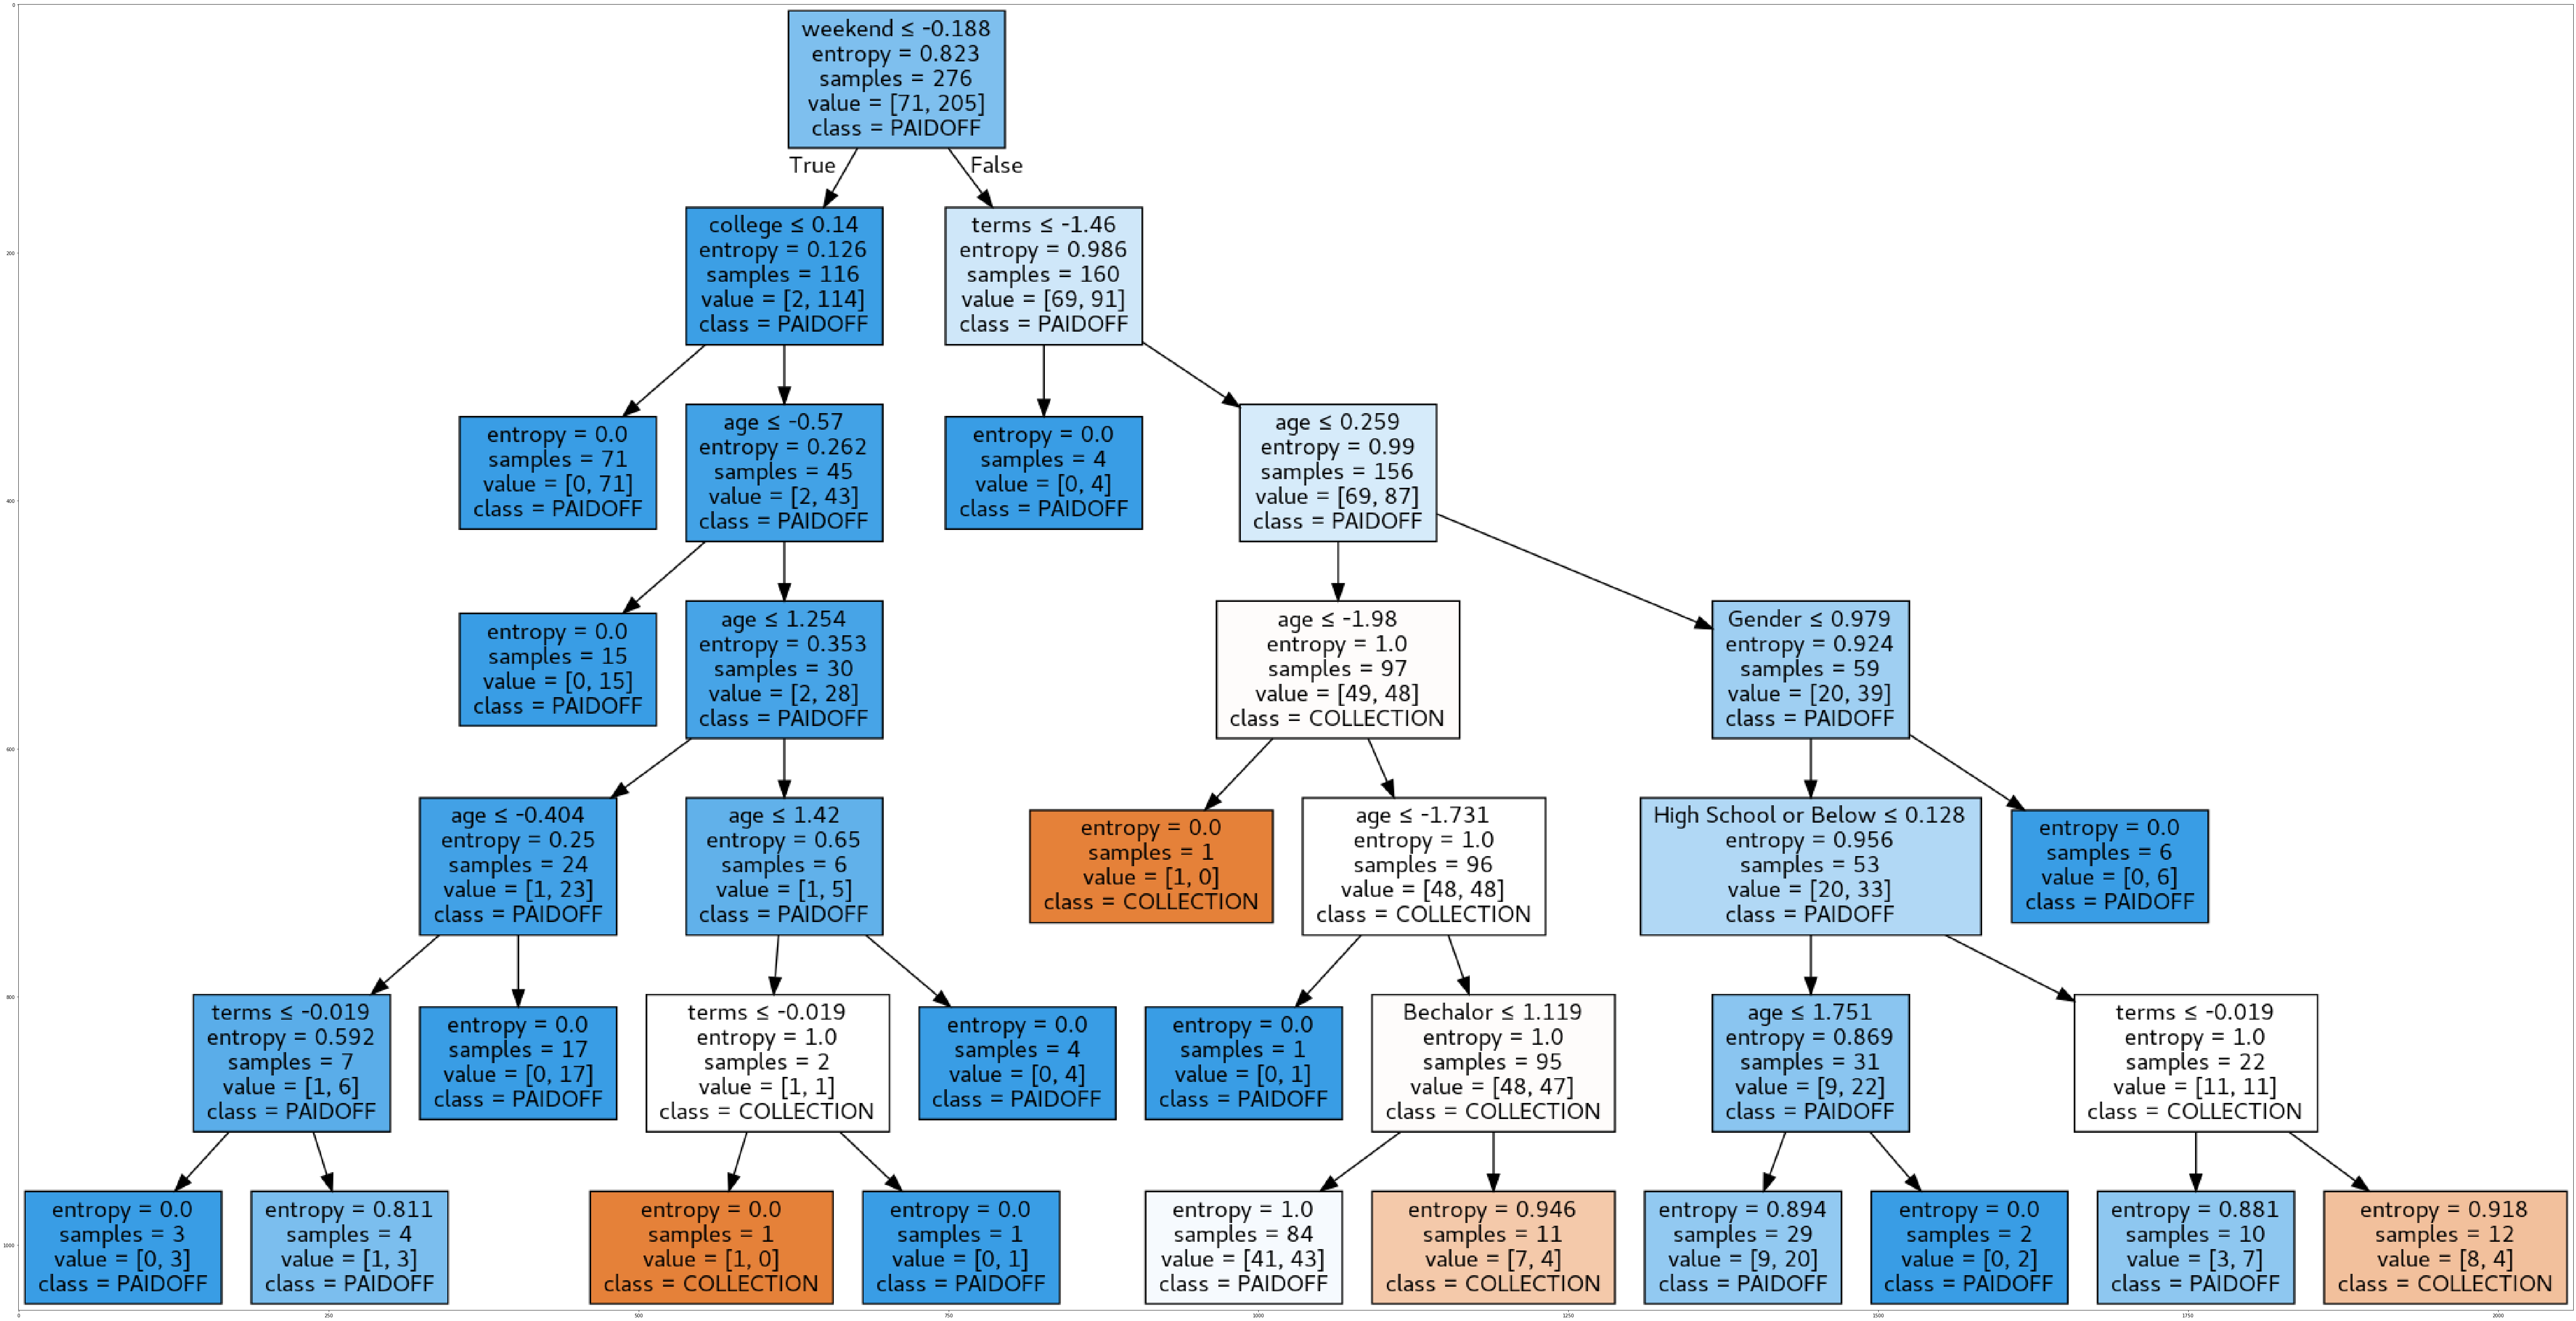

In [32]:
dot_data = StringIO()
filename = "tree_model.png"
featureNames = Feature.columns[0:8]
np.unique(df['loan_status'])
out=tree.export_graphviz(tree_model,feature_names=featureNames, out_file=dot_data, class_names= ['COLLECTION','PAIDOFF'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with depth =", tree_model.max_depth) 

The best accuracy was with 0.7857142857142857 with depth = 6


# Support Vector Machine


The SVM algorithm offers a choice of kernel functions for performing its processing, such as:


```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```
We will choose different functions in turn and compare the results.

In [34]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [35]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    
    #Create an instance of the DecisionTreeClassifier called tree_model and train the model
    svm_model = svm.SVC(kernel=kernel).fit(X_train,y_train)
    #Predict 
    pred_svm = svm_model.predict(X_test)
    svm_accuracy = metrics.accuracy_score(y_test, pred_svm)
    #Evaluation, Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true = y_test, y_pred = pred_svm)
    np.set_printoptions(precision=2)
    print(svm_model.kernel)
    print('F1 score = ', f1_score(y_test, pred_svm, average='weighted') )
    print('Confusion matrix: \n', cnf_matrix)
    print ('Classification report: \n', classification_report(y_test, pred_svm))


linear
F1 score =  0.6914285714285714
Confusion matrix: 
 [[ 0 15]
 [ 0 55]]
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

poly
F1 score =  0.7064793130366899
Confusion matrix: 
 [[ 1 14]
 [ 2 53]]
Classification report: 
               precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.79      0.96      0.87        55

    accuracy                           0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70

rbf
F1 score =  0.7275882012724117
Confusion matrix: 
 [[ 4 11]
 [ 7 48]]
Classification report: 
               precision    recall  f1-score  

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There is a high cost associated with false negatives, therefore we need to maximize recall on Collection, so the best model is Radial basis function (RBF)

In [36]:
svm_model = svm.SVC(kernel='rbf').fit(X_train,y_train)
pred_svm = svm_model.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, pred_svm)
print( "The best accuracy was with", svm_accuracy, "with kernel function =", svm_model.kernel) 

The best accuracy was with 0.7428571428571429 with kernel function = rbf


# Logistic Regression


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [38]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    log_model = LogisticRegression(C=0.01, solver=i).fit(X_train,y_train)
    pred_log = log_model.predict(X_test)
    pred_log_prob = log_model.predict_proba(X_test)
    log_loss_i = log_loss(y_test, pred_log_prob)
    print('Solver ', i, ',\nLog loss = ', log_loss_i,',\nJ-score', jaccard_score(y_test, pred_log), ',\nF1-Score', f1_score(y_test, pred_log, average='weighted'),'\n\n')


Solver  newton-cg ,
Log loss =  0.492017801467927 ,
J-score 0.7857142857142857 ,
F1-Score 0.6914285714285714 


Solver  lbfgs ,
Log loss =  0.4920179847937498 ,
J-score 0.7857142857142857 ,
F1-Score 0.6914285714285714 


Solver  liblinear ,
Log loss =  0.5772287609479654 ,
J-score 0.6764705882352942 ,
F1-Score 0.6670522459996144 


Solver  sag ,
Log loss =  0.4920081912138719 ,
J-score 0.7857142857142857 ,
F1-Score 0.6914285714285714 


Solver  saga ,
Log loss =  0.49201831918940014 ,
J-score 0.7857142857142857 ,
F1-Score 0.6914285714285714 




Best model is sag with C = 0.01

In [39]:
log_model = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)

# Model Evaluation using Test set


In [40]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [41]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-01-26 20:08:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-01-26 20:08:29 (69.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [42]:
test_df = pd.read_csv('loan_test.csv')
test_df.shape

(54, 10)

In [43]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = test_df['loan_status'].values
print(X[0:5], '\n\n', y[0:5])

[[ 0.49  0.93  3.06  1.98 -1.3   2.4  -0.8  -0.86]
 [-3.56 -1.7   0.53 -0.51  0.77 -0.42 -0.8  -0.86]
 [ 0.49  0.93  1.88  1.98  0.77 -0.42  1.25 -0.86]
 [ 0.49  0.93 -0.98 -0.51  0.77 -0.42 -0.8   1.16]
 [-0.67 -0.79 -0.48 -0.51  0.77  2.4  -0.8  -0.86]] 

 [1 1 1 1 1]


In [44]:
results = pd.DataFrame(columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])
for model in [knn_model, tree_model,svm_model,log_model]:
    yhat=model.predict(X)
    jaccard=jaccard_score(y, yhat)
    f1_Score=f1_score(y, yhat, average='weighted')
    log_loss_i = np.NaN
    if model==log_model:
        pred_log_prob = model.predict_proba(X)
        log_loss_i = log_loss(y, pred_log_prob)
    results = results.append({'Algorithm': model, 'Jaccard':jaccard, 'F1-score':f1_Score, 'LogLoss':log_loss_i}, ignore_index=True)
results

,Algorithm,Jaccard,F1-score,LogLoss
0,KNeighborsClassifier(n_neighbors=7),0.653846,0.632840,NaN
1,"DecisionTreeClassifier(criterion='entropy', ma...",0.711538,0.670478,NaN
2,SVC(),0.780000,0.758350,NaN
3,"LogisticRegression(C=0.01, solver='sag')",0.740741,0.630418,0.516365
